In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import os 
from bokeh.plotting import figure,show
from bokeh.layouts import gridplot
from ipywidgets import interact,interact_manual

C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

<b>Project Objective<b/>


Covid-19 pandemic will be remembered as one of the events that has devastating effects on humankind. The pandemic started and rapidly spread in the early 2020s, whose effect is still seen till today in some countries, has caused destruction of many stable economies which resulted in immense jobloss. In this project, we aim to understand how it affected the enrollment rates in colleges in top populated states in the U.S. To understand this question, we use the education data facilitated by the Urban Education Institute. 

In [3]:
#path = r'E:/Autumn22/Python\\PS2\\EducationDataPortal_10.22.2022_all_files\\EducationDataPortal_10.22.2022_level_of_study.csv'
#data_enrollment_path = os.path.join(path, 'EducationDataPortal_10.22.2022_level_of_study.csv')
data_enrollment = pd.read_csv('E:\Autumn22\Python\PS2\EducationDataPortal_10.22.2022_all_files\EducationDataPortal_10.22.2022_all_files\EducationDataPortal_10.22.2022_level_of_study.csv')
data_college = pd.read_csv('E:\Autumn22\Python\PS2\EducationDataPortal_10.22.2022_all_files\EducationDataPortal_10.22.2022_all_files\EducationDataPortal_10.22.2022_College.csv')


In [4]:
data = pd.merge(data_enrollment, data_college, on = ['year', 'inst_name', 'state_abbr'])

In [5]:
data = data.drop(['unitid_x', 'unitid_y', 'institution_level', 'inst_name'], axis = 1)

In [6]:
grouped_data = data.groupby(['state_abbr','year']).sum()

grouped_data = grouped_data.reset_index()

grouped_data = pd.pivot(grouped_data, index = ['state_abbr' ], columns = 'year', values = 'enrollment_fall')

grouped_data = grouped_data.reset_index()

#grouped_data



<AxesSubplot:title={'center':'Change in college enrollment in US states from 2019 to 2020'}, xlabel='States', ylabel='Enrollment in Millions'>

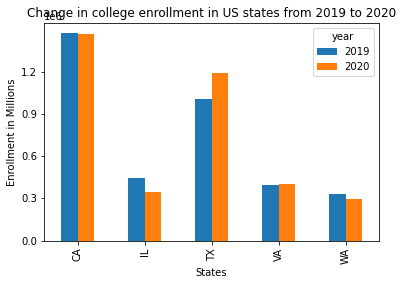

In [7]:


grouped_data.plot(x = 'state_abbr', 
                  #y = [2019, 2020], 
                  kind = 'bar',
                  title = 'Change in college enrollment in US states from 2019 to 2020',
                  xlabel = 'States',
                  ylabel = 'Enrollment in Millions',
                  yticks = np.arange(0, 1500000, 300000)
                  )

In [8]:
grouped_data1 = data.groupby(['state_abbr','year']).sum()

grouped_data1 = grouped_data1.reset_index()

grouped_data1 = pd.pivot(grouped_data1, index = ['year'], columns = 'state_abbr', values = 'enrollment_fall')

grouped_data1 = grouped_data1.reset_index()

#grouped_data1

<AxesSubplot:title={'center':'Change in college enrollment in US states from 2019 to 2020'}, xlabel='States', ylabel='Enrollment in Millions'>

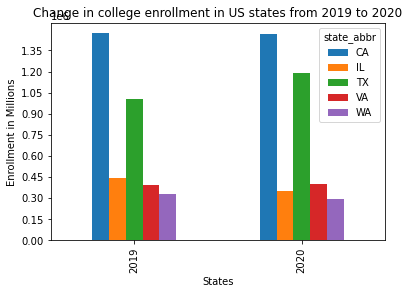

In [9]:


grouped_data1.plot(x = 'year',  
                  kind = 'bar',
                  title = 'Change in college enrollment in US states from 2019 to 2020',
                  xlabel = 'States',
                  ylabel = 'Enrollment in Millions',
                  yticks = np.arange(0, 1500000, 150000)
                  )

In [10]:
#Bokeh

In [11]:
data.head()

,year,state_abbr,level_of_study,enrollment_fall,inst_control
0,2020,CA,Graduate,196,Private for-profit
1,2020,CA,Undergraduate,69,Private for-profit
2,2020,CA,Graduate,61,Private not-for-profit
3,2020,CA,Graduate,2804,Private for-profit
4,2020,CA,Undergraduate,6124,Private for-profit


In [12]:
bokeh_data = data.groupby(['state_abbr','year']).sum()


bokeh_data

enrollment_fall
state_abbr year                 
CA         2019          1472390
           2020          1467718
IL         2019           443988
           2020           348557
TX         2019          1004605
           2020          1189577
VA         2019           392940
           2020           399259
WA         2019           330437
           2020           293688

In [13]:
state_names = data['state_abbr'].unique()
state_names

array(['CA', 'IL', 'TX', 'VA', 'WA'], dtype=object)

In [14]:
#from bokeh.models import Range1d
#from bokeh.models import FactorRange 

#x = ['2019', '2020']

def plot_enrollment(df, state):
    plot = figure(title=state,
                  x_axis_label='Year',
                  y_axis_label='Enrollment in Millions',
                  #x_range = FactorRange(*x)
                 #y_range = Range1d(0,10000000),
                 #margin = (0, 0, 0, 0),
                 #title = 'Change in college enrollment for the state'
                 )
    data = df.loc[state]
    plot.vbar(x= [2019, 2020] , top = data['enrollment_fall'], width = 0.5)
    
    #Using Line, but the data is not continuous
    #plot.line(data.index, data['enrollment_fall'])

    return plot

In [15]:
@interact(state = state_names)
def make_plot_enrollment(state=state_names[0]):
    plot = plot_enrollment(bokeh_data, state)
    show(plot)

interactive(children=(Dropdown(description='state', options=('CA', 'IL', 'TX', 'VA', 'WA'), value='CA'), Outpu…

Is the trend same for Males and Females? Now a question arises, is this drop in college enrollment common across Males and Females? We answer this question by again using the data retrieved from the Urban education. 

In [16]:
data_sex = pd.read_csv('E:\Autumn22\Python\PS2\EducationDataPortal_10.22.2022_all_files_sex\EducationDataPortal_10.22.2022_all_files\EducationDataPortal_10.22.2022_level_of_studyRaceSex.csv')
data_sex = data_sex[data_sex['sex'] != 'Total']
data_sex = data_sex[data_sex['race'] == 'Total'].drop(['race', 'unitid', 'inst_name'], axis = 1)



In [17]:
grouped_sex_data = data_sex.groupby(['state_abbr', 'year', 'sex']).sum()
grouped_sex_data = grouped_sex_data.reset_index()

In [18]:
#state_names_sex = data_sex['state_abbr'].unique()
state_names1 = data_sex['state_abbr'].unique()
sex_names = data_sex['sex'].unique()

In [19]:
#grouped_sex_data.loc[(grouped_sex_data['state_abbr'] == 'CA') & (grouped_sex_data['sex'] == 'Female')]

In [20]:

years = ['2017', '2018', '2019', '2020']
enrollments = ['200000', '500000', '1000000']


def plot_enrollment1(df, state,sex):
    plot = figure(title=state + ' ' +sex,
                  x_axis_label='Year',
                  y_axis_label='Enrollment in Millions',
                  
                 #x_range = years,
                 #margin = (0, 0, 0, 0),
                 plot_height = 300)
    data = df.loc[(df['state_abbr'] == state) & (df['sex'] == sex)]
    plot.line(data['year'], data['enrollment_fall'])
    return plot




In [21]:
@interact(state = state_names1, sex = sex_names)

def make_plot_enrollment1(state=state_names1, sex = sex_names):
    plot = plot_enrollment1(grouped_sex_data, state, sex)
    show(plot)

interactive(children=(Dropdown(description='state', options=('CA', 'IL', 'NY', 'TX'), value='CA'), Dropdown(de…

<b> Summary </b>


Covid-19 pandemic will be remembered as one of the events that has devastating effects on humankind. The pandemic started and rapidly spread in the early 2020s, whose effect is still seen till today in some countries, has caused destruction of many stable economies which resulted in immense jobloss. 

In this project, we aim to understand how it affected the enrollment rates in colleges in top populated states in the U.S. To understand this question, we use the education data facilitated by the Urban Education Institute. We download the data for College enrollment in top 5 populated states in the US, which results in 2 csv files. We then load the files and merge the same and drop the columns such as Institution level that are not relevant to the research question in place. We consolidate all plot paramenters under one function and then plot the trend as a bar plot to display the trend. 

As we can see in the graph result, where we compare the enrollments effects between 2019 and 2020 in five states, namely California, Virginia, Illinois, Texas and Washington, we see an enrollment drop in colleges in most of the states. This may be due to financial distress caused by the pandemic, this arguments may be analyzed further. To further add to the vizualisation, we plot a bokeh with interactive elements that allow the user to select the state to vizualise the trend in college enrollments. The code is easily changeable as per the data downloaded, such as with very minute changes, we can replicate the code to observe college enrollment trends across various "races" across the states selected.


<b>Is the trend same for Males and Females?</b>

Now a question arises, is this drop in college enrollment common across Males and Females? We answer this question by again using the data retrieved from the Urban education.  As we have multiple options and multiple variables to vizualize, namely the state and sex, we employ an interactive bokeh plot to serve our needs. Given an input, for example(Texas, Male), we would be able to visualize the trend in college enrollment for Males in Texas. We consolidate all bokeh parameters and build two functions that produces a bokeh with interactive elements such as the State name and Sex. These functions are easily changeable according to the data downloaded, such as with very minute changes, we can replicate the code to observe college enrollment trends across various "races" across the states selected.

From what we observe, almost all states have seen a massive drop in the enrollment especially for females when compared to males. This may be due to the increase in responsibilities that Females faced due to financial distress, family responsibilities, job switching opportunities etc. This may be further analyzed to find the actual reason behind the drop. 

<b> Benefits of using Urban Education data </b>

The Urban education data that we have used made the job easier through its structured nature and facility of downloading data as per various, multilayers of options provided. To deep dive into education and more questions related to covid effect, effect on earnings, loan repayment, the urban education data would be a right fit to answer these questions.